# Models for learning word embeddings


In [1]:
load_model = 'fasttext_speeches_nltk_mincount20_window2_size300_alpha0.03_minalpha0.0007_negative20_workers10.model' # model_name
model_name = 'fasttext'
#model = 'word2vec'

In [2]:
if model_name == 'fasttext':
    from gensim.models import FastText as Model
elif model_name == 'word2vec':
    from gensim.models import word2vec as Model
elif model_name == 'word2vec':
    raise Exception("Non allowed parameter for model.")

unable to import 'smart_open.gcs', disabling that module


In [3]:
model = Model.load(load_model)

In [4]:
# Make model more memory-efficient
model.init_sims(replace=True)

# Exploring the model
## Most similar to:


In [5]:
model.wv.most_similar(positive=["keskusta"])

[('keskust', 0.7581509947776794),
 ('keskustapuolue', 0.696725606918335),
 ('keskustalais', 0.6881887316703796),
 ('keskustalain', 0.6870530843734741),
 ('keskustalaist', 0.6520498394966125),
 ('keskustajohtoin', 0.641777515411377),
 ('keskustajohtois', 0.6323479413986206),
 ('keskus', 0.6263800263404846),
 ('keskusp', 0.6055977940559387),
 ('keskustelusta', 0.6003153920173645)]

In [6]:
model.wv.most_similar(positive=["juha"])

[('juho', 0.6884548664093018),
 ('juha_sipil', 0.6118826270103455),
 ('puheenjohtaj_juha', 0.5960877537727356),
 ('pääminister_juha', 0.588132381439209),
 ('juhl', 0.5337047576904297),
 ('borg', 0.5312036275863647),
 ('juk', 0.5241467356681824),
 ('timo_soini', 0.5089672803878784),
 ('pek', 0.5014104843139648),
 ('timo_soin', 0.4912891089916229)]

In [7]:
model.wv.most_similar(positive=["sipilä"])

[('sipil', 0.8994264006614685),
 ('juha_sipil', 0.7171946167945862),
 ('sipil_hallitus', 0.6573438048362732),
 ('sipil_hallituks', 0.6429762840270996),
 ('pääminister_sipil', 0.5998337268829346),
 ('edustaj_sipil', 0.5756904482841492),
 ('puheenjohtaj_sipil', 0.5708429217338562),
 ('sipo', 0.530336856842041),
 ('pääminister_juha', 0.5136686563491821),
 ('pääminister_jyrk', 0.4675033390522003)]

In [8]:
model.wv.most_similar(positive=["orpo"])

[('petter_orpo', 0.6989803910255432),
 ('minister_orpo', 0.602318525314331),
 ('räsäs', 0.5278457403182983),
 ('brax', 0.5205757021903992),
 ('räsän', 0.5147995352745056),
 ('berner', 0.4995120167732239),
 ('annamaj_henrikso', 0.49827706813812256),
 ('rehul', 0.4964030683040619),
 ('holmlund', 0.4955231845378876),
 ('lepomäk', 0.4951530992984772)]

## Similarities:

In [9]:
model.wv.similarity("keskusta", 'kokoomus')

0.38219404

In [10]:
model.wv.similarity('juha_sipilä', 'orpo')

0.27018276

## Odd-One-Out:

Here, we ask our model to give us the word that does not belong to the list!

In [11]:
model.wv.doesnt_match(['keskusta', 'juha_sipilä', 'orpo'])

'keskusta'

In [12]:
model.wv.doesnt_match(['kokoomus', 'juha_sipilä', 'orpo'])

'juha_sipilä'

## Analogy difference:

In [13]:
model.wv.most_similar(positive=["orpo"], negative=["keskusta","sipilä"], topn=3)

[('petter_orpo', 0.5228233337402344),
 ('räsän', 0.3894343972206116),
 ('räsäs', 0.3879562318325043)]

### t-SNE visualizations:

In [14]:
from plotting import TSNE_scatterplot

## 10 Most similar words vs. 10 Most dissimilar


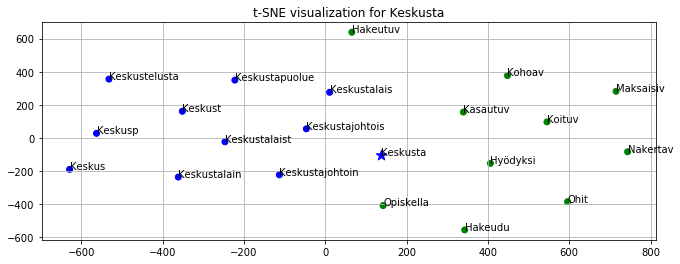

In [15]:
TSNE_scatterplot(model, 'keskusta', "orpo", save=True)